In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
for date in latest_date:
    the_date = pd.to_datetime(date)

('2017-08-23',)

In [41]:
latest_date_clean = dt.date(the_date.year,the_date.month,the_date.day)
latest_date_clean

datetime.date(2017, 8, 23)

In [10]:
date_year_ago = dt.date(the_date.year-1,the_date.month,the_date.day)
date_year_ago

datetime.date(2016, 8, 23)

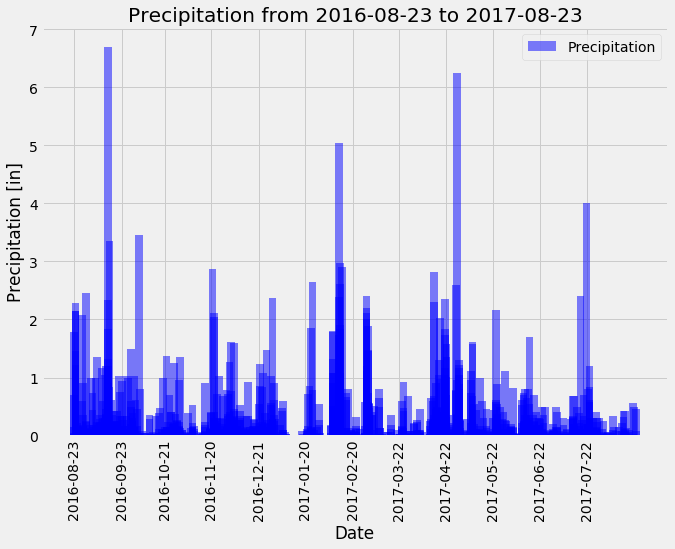

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date_year_ago = dt.date(the_date.year-1,the_date.month,the_date.day)
one_year_data = session.query(Measurement.date,Measurement.prcp).\
            filter(Measurement.date >= date_year_ago).all()
one_year_data
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
last_year_prcp_df = pd.DataFrame(one_year_data)
last_year_prcp_df.rename(columns = {0:"Date", 1:"Precipitation (in)"},inplace=True)
# Sort the dataframe by date
last_year_prcp_df.sort_values(by="Date",ascending=True,inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
x = last_year_prcp_df["Date"].tolist()
y = last_year_prcp_df["Precipitation (in)"].tolist()

plt.figure(figsize=(10,7))
plt.bar(x,y,width = 5,color='b', alpha=0.5, align='center',label='Precipitation')
plt.tick_params(
    axis='x',        # changes apply to the x-axis
    which='both',    # both major and minor ticks are affected
    bottom=False,    # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

major_ticks = (0,31,59,89,120,150,181,211,242,272,303,333)
plt.xticks(major_ticks,rotation=90)

plt.title(f"Precipitation from {date_year_ago} to {latest_date_clean}")
plt.xlabel("Date")
plt.ylabel("Precipitation [in]")
plt.legend(loc='upper right')
plt.grid(which='major', axis='both', linestyle='-')

plt.show()

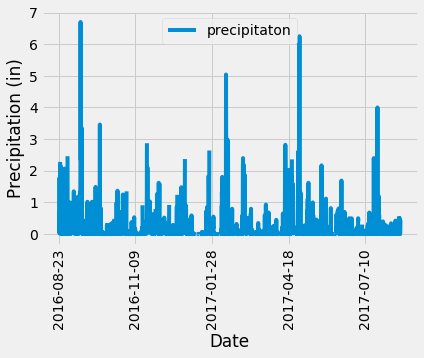

In [46]:
#Use Pandas Plotting with Matplotlib to plot the data
last_year_prcp_df.plot(x="Date",y="Precipitation (in)")
plt.xlabel("Date")
plt.ylabel("Precipitation (in)")
plt.xticks(rotation=90)
plt.legend(["precipitaton"], loc="best")
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_prcp_df.describe()

,Precipitation (in)
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
total_stations

9

In [17]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc())
for row in active_stations:
    print(row)

('USC00519281', 2772)
('USC00513117', 2709)
('USC00519397', 2724)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).first()[0]
                                
most_active_station_info = session.query(Measurement.station,Measurement.tobs).\
            filter(Measurement.station == most_active_station).all()
most_active_station_summary = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                group_by(Measurement.station).filter(Measurement.station == most_active_station)
for row in most_active_station_summary:
    print(row)


(54.0, 85.0, 71.66378066378067)


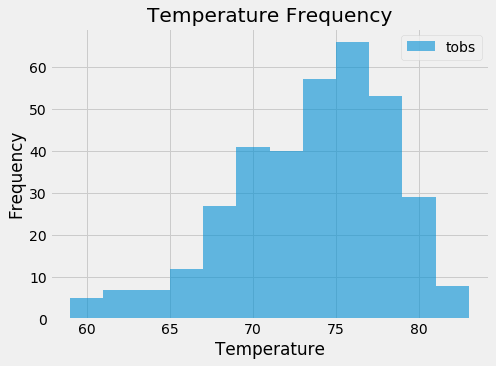

In [65]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_last12_most_active = session.query(Measurement.date,Measurement.tobs).\
        filter((Measurement.station == most_active_station)).\
        filter(Measurement.date >= date_year_ago)

frequency_df = pd.DataFrame(temp_last12_most_active)
frequency_df.rename(columns = {0:"Date", 1:"tobs"},inplace=True)

plt.figure(figsize=(7,5))
plt.hist(frequency_df['tobs'],bins=12,alpha=0.6,linewidth=1)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title("Temperature Frequency")
plt.legend(["tobs"], loc='best')
plt.show()

# Close Session

In [66]:
# Close Session
session.close()